In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Modelling
from sklearn.metrics import classification_report, precision_score,recall_score 
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB


In [ ]:
df = pd.read_csv('Airline Quality Ratings.csv')
df.head()

In [ ]:
df.describe()

Missing data


After dropping rows with missing values


In [ ]:
df.isna().sum()

In [ ]:
df = df.dropna(inplace=True)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df_cat = df.drop(columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])
df = df.drop(columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])


In [ ]:
df['target'] = df['Satisfaction']

In [ ]:
df = df.drop(columns='Satisfaction')

In [ ]:
target_cat = df[['target']]

In [ ]:
df = pd.concat([df, cat_ohe], axis=1)

In [ ]:
df = df.drop(columns= 'target')

In [ ]:
df.head()

In [ ]:
df.corr()['target_Satisfied']

In [15]:
df = df.drop(columns=['Age','Departure Delay','Arrival Delay', 'Departure and Arrival Time Convenience', 'Gate Location'])

In [16]:
df.shape

(129487, 15)

In [17]:
df

,ID,Flight Distance,Ease of Online Booking,Check-in Service,Online Boarding,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,821,3,4,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,821,2,3,5,5,4,5,5,3,5,2,5,5,Satisfied
2,3,853,4,4,5,3,5,3,5,5,3,4,3,3,Satisfied
3,4,1905,2,3,4,5,5,5,4,4,5,2,5,5,Satisfied
4,5,3470,3,3,5,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,447,4,4,4,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,308,3,5,3,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,337,2,4,2,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,337,4,3,4,4,4,5,3,3,4,5,3,5,Satisfied


In [20]:
le = LabelEncoder()

# Fit and transform the data
df['Satisfaction_encoded'] = le.fit_transform(df['Satisfaction'])
print(df)

            ID  Flight Distance  Ease of Online Booking  Check-in Service  \
0            1              821                       3                 4   
1            2              821                       2                 3   
2            3              853                       4                 4   
3            4             1905                       2                 3   
4            5             3470                       3                 3   
...        ...              ...                     ...               ...   
129875  129876              447                       4                 4   
129876  129877              308                       3                 5   
129877  129878              337                       2                 4   
129878  129879              337                       4                 3   
129879  129880              337                       3                 4   

        Online Boarding  On-board Service  Seat Comfort  Leg Room Service  

In [22]:
target = df['Satisfaction_encoded']
df.drop(columns=['Satisfaction', 'Satisfaction_encoded'], axis=1, inplace=True)

In [23]:
df

,ID,Flight Distance,Ease of Online Booking,Check-in Service,Online Boarding,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,1,821,3,4,3,3,5,2,5,5,5,3,5,5
1,2,821,2,3,5,5,4,5,5,3,5,2,5,5
2,3,853,4,4,5,3,5,3,5,5,3,4,3,3
3,4,1905,2,3,4,5,5,5,4,4,5,2,5,5
4,5,3470,3,3,5,3,4,4,5,4,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,447,4,4,4,5,1,4,4,4,5,4,4,4
129876,129877,308,3,5,3,5,2,5,2,2,4,3,2,5
129877,129878,337,2,4,2,3,3,4,3,3,4,2,3,5
129878,129879,337,4,3,4,4,4,5,3,3,4,5,3,5


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    df, target, test_size=0.2, random_state=42)

# Instantizing Model
lr_model_final = LogisticRegression(random_state=24)

# training
lr_model_final.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=24)

In [25]:
pred = lr_model_final.predict(X_test)
pred_prob = lr_model_final.predict_proba(X_test)

# print classification report
print("Classification Report :\n",
      classification_report(y_test, pred, digits=4))



Classification Report :
               precision    recall  f1-score   support

           0     0.7604    0.7000    0.7289     14685
           1     0.6441    0.7111    0.6760     11213

    accuracy                         0.7048     25898
   macro avg     0.7022    0.7056    0.7024     25898
weighted avg     0.7100    0.7048    0.7060     25898



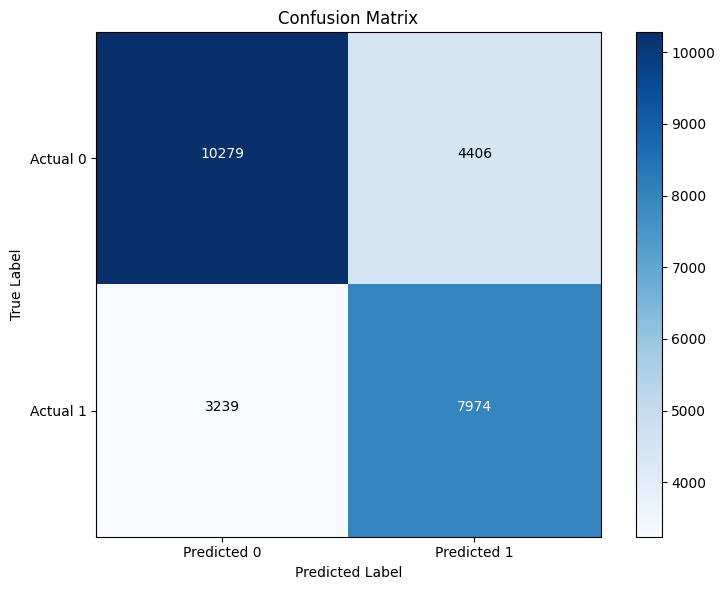

In [26]:
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [27]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Make predictions
y_pred = model_nb.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)



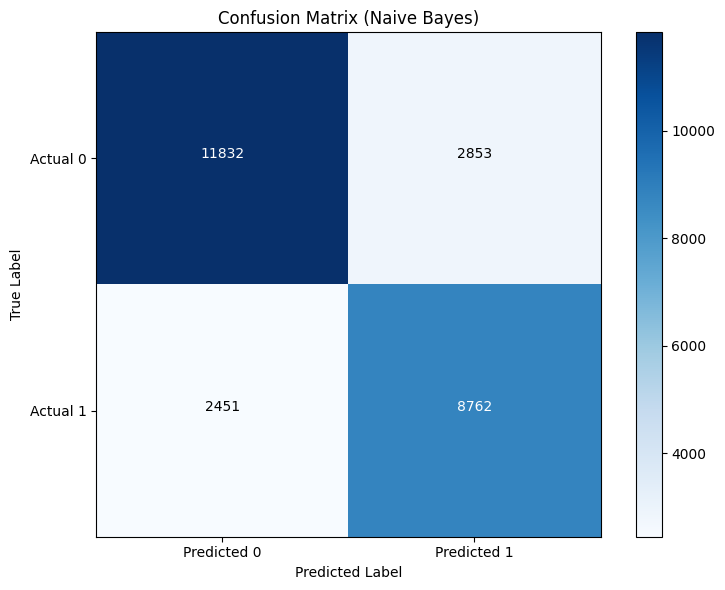

In [28]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Naive Bayes)')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [29]:
print("Classification Report :\n",
      classification_report(y_test, y_pred, digits=4))

Classification Report :
               precision    recall  f1-score   support

           0     0.8284    0.8057    0.8169     14685
           1     0.7544    0.7814    0.7677     11213

    accuracy                         0.7952     25898
   macro avg     0.7914    0.7936    0.7923     25898
weighted avg     0.7963    0.7952    0.7956     25898

